# SD212: Graph mining
## Lab 2: Graph models

You will learn to generate random graphs.

## Import

In [1]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

## 1. Erdos-Renyi graphs

The `networkx` package contains functions to generate random graphs.

In [6]:
n = 200
p = 0.01

In [8]:
graph = nx.erdos_renyi_graph(n,p)

In [9]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 172
Average degree:   1.7200


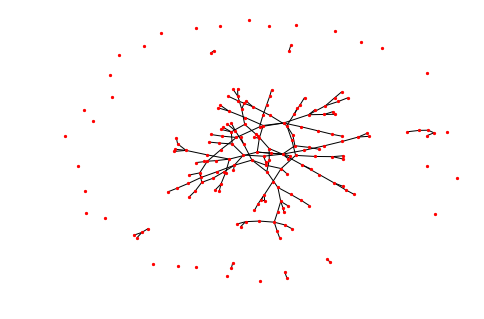

In [10]:
nx.draw(graph, node_size=5)

## To do

### * Generate several instances of the graph and observe the results.


Name: 
Type: Graph
Number of nodes: 200
Number of edges: 208
Average degree:   2.0800


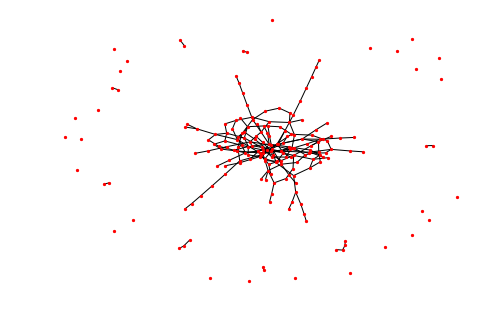

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 224
Average degree:   2.2400


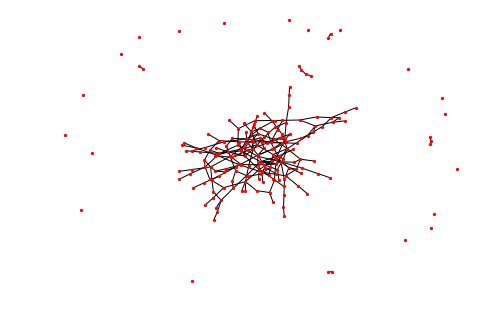

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 181
Average degree:   1.8100


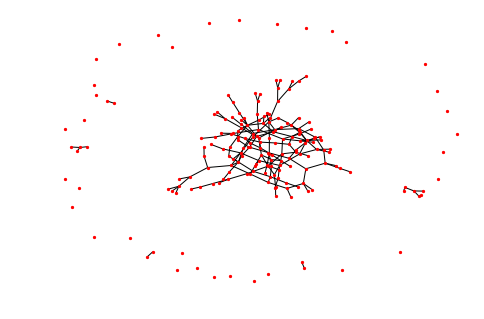

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 231
Average degree:   2.3100


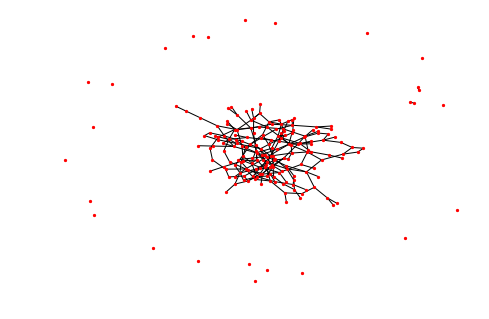

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 185
Average degree:   1.8500


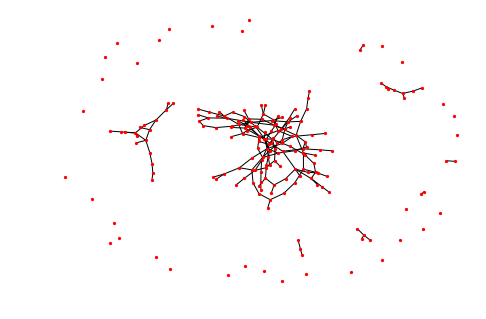

In [16]:
for i in range(5):
    graph = nx.erdos_renyi_graph(n,p)
    print(nx.info(graph))
    nx.draw(graph, node_size=5)
    plt.show()

The graphs look the same.

### * Plot the average size of the largest connected component of the graph with respect to $p$.

# What is the critical value for $p$?

### * Plot the average degree of nodes belonging to the largest connected component with respect to $p$. 

# Compare this value to $np$ and interpret the results.

**Hint:** Use the function ```max(nx.connected_component_subgraphs(graph), key = len)``` to get the largest connected component of the graph.

In [17]:
from tqdm import tqdm

In [18]:
Ps = np.arange(0.001, 1, 0.001)
sizes=[]
average_degrees = []
NPs = []

def get_average_degree(G):
    tuples = list(G.degree())
    degrees = [kv[1] for kv in tuples]
    return np.mean(degrees)

import time

In [ ]:
start = time.time()
for i in tqdm(range(len(Ps))):
    p=Ps[i]
    graph = nx.erdos_renyi_graph(n,p)
    subgraph = max(nx.connected_component_subgraphs(graph), key = len)
    size = subgraph.size()
    sizes.append(size)
    average_degree = get_average_degree(graph)
    average_degrees.append(average_degree)
    NPs.append(n*p)
end = time.time()
print("It took : %f" % (end-start))

 84%|████████▎ | 835/999 [01:05<00:23,  7.11it/s]

In [25]:
def build_averages(p):
    graph = nx.erdos_renyi_graph(n,p)
    subgraph = max(nx.connected_component_subgraphs(graph), key = len)
    size = subgraph.size()
#     sizes.append(size)
    average_degree = get_average_degree(graph)
#     average_degrees.append(average_degree)
#     NPs.append(n*p)
    return [size,average_degree, n*p]

In [26]:
from multiprocessing import Pool
import workers
import time

ModuleNotFoundError: No module named 'workers'

In [27]:
if __name__ ==  '__main__': 
    num_processors = 4
    start = time.time()
    pool=Pool(processes = num_processors)
    all_res = pool.map(workers.build_averages, Ps)
    sizes=[]
    average_degrees = []
    NPs = []
    for res in all_res:
        sizes.append(res[0])
        average_degrees.append(res[1])
        NPs.append(res[2])
    end = time.time()
    print("It took : %f" % (end-start))

NameError: name 'workers' is not defined

## Avec multiprocessing, on est tombé de 83sec a 28sec !

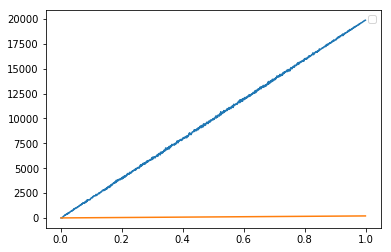

In [28]:
plt.plot(Ps, sizes)
plt.plot(Ps, NPs)
plt.legend("size", "np")
plt.show()

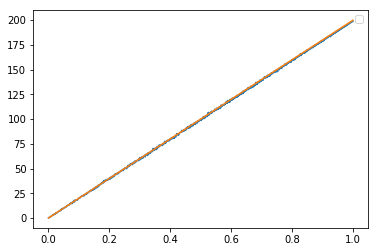

In [29]:
plt.plot(Ps, average_degrees)
plt.plot(Ps,NPs)
plt.legend("degree", "np")
plt.show()

## ==> Average degree = = NP !!!!

## 2. Preferential attachment

The degree distribution of an Erdos-Renyi graph is approximately binomial (for large n), as shown below.

In [30]:
n = 200
p = 0.02
graph = nx.erdos_renyi_graph(n,p)

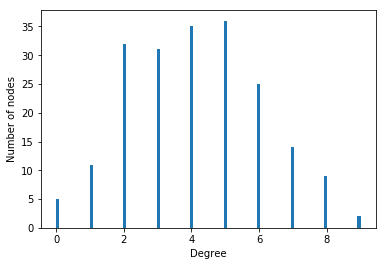

In [31]:
degrees = [graph.degree(u) for u in graph.nodes()]
plt.hist(degrees, bins = 100)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

The Barabasi-Albert model, based on the principle of **preferential attachment**, provides a random graph with a **power-law** degree distribution.

In [32]:
n = 200
d = 3 # degree of new nodes
graph = nx.barabasi_albert_graph(n, d) 
graph.add_edges_from(nx.complete_graph(d).edges()) # adding the initial clique (removed by networkx)

In [33]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 594
Average degree:   5.9400


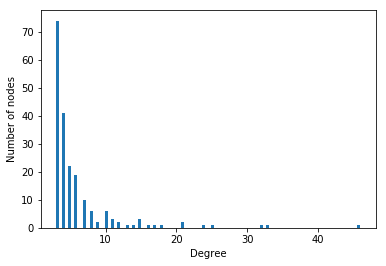

In [34]:
degrees = [graph.degree(u) for u in graph.nodes()]
plt.hist(degrees, bins = 100)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

## To do

* Code a function that generates a Barabasi-Albert graph starting from any initial graph (not necessarily a clique).
* Test your code on various initial graphs of 4 nodes.

In [36]:
def get_proba_degree(G, N, d):
    tuples = list(G.degree())
    degrees = [kv[1] for kv in tuples]
    nodes = [i for i in range(N)]
    proba = degrees/np.sum(degrees) 
    neighbors = np.random.choice(nodes, d, replace=False, p=proba)
    return neighbors

def add_edges(G, node, neighbors):
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

def general_barabasi_albert_graph(n, d, init_graph):
    if d>n:
        raise ValueError("d<n !")
    # init_graph must be connected and must have between d and n nodes 
    graph = init_graph.copy()
    N = len(graph)
    
    for t in range(n-d):
        # neighbors are chosen randomly among the d+t-1 with proba = degree
        # you may use the function np.random.choice
        neighbors = get_proba_degree(graph,N,d)
        
        # Add new node of degree d
        graph.add_node(N)
        
        add_edges(graph, N, neighbors)
        #increase graph size
        N+=1
        
    return graph    

In [37]:
# To check
init =  nx.complete_graph(3)
print(nx.info(init))
graph = general_barabasi_albert_graph(100, 3, init)

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 3
Average degree:   2.0000


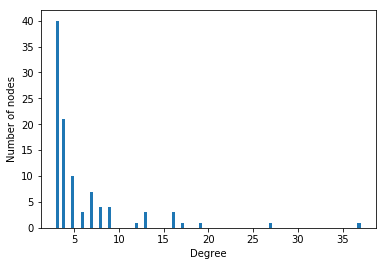

In [38]:
degrees = [graph.degree(u) for u in graph.nodes()]
plt.hist(degrees, bins = 100)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

## 3. Configuration model

We now focus on graphs with some given degree sequence. The Havel-Hakimi algorithm generates such a graph provided the degree sequence is valid (that is, **graphical**); otherwise, it returns an error. The resulting graph is not necessarily connected.

In [41]:
graph = nx.havel_hakimi_graph([2,2,2])

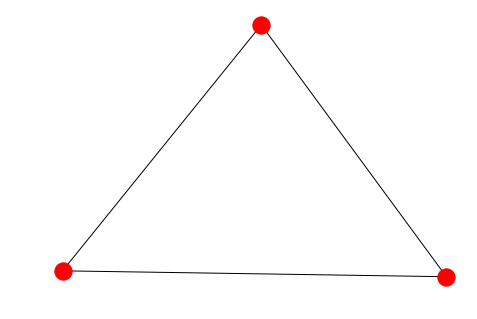

In [51]:
nx.draw(graph)

## To do 

* Test various degree sequences (you may get valid sequences from actual graphs, see the [networkx graph generators](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html))

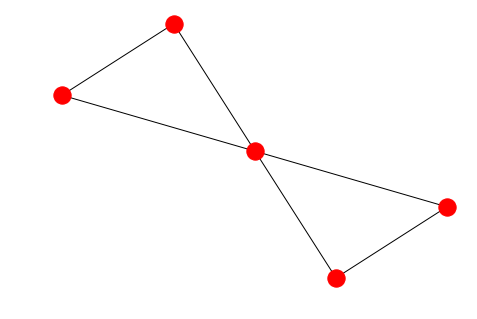

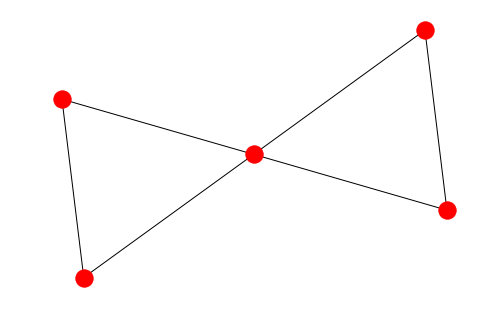

[4 4 2 4 4] error


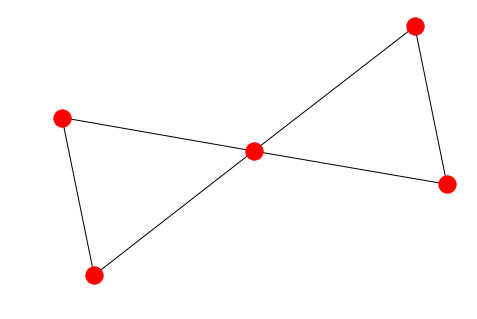

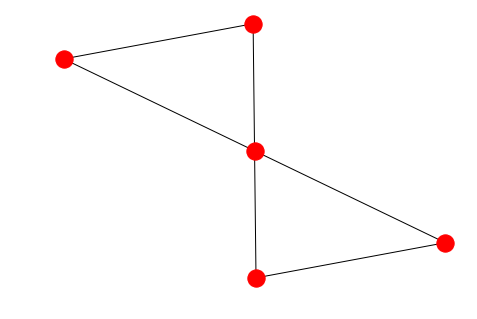

In [52]:
for i in range(5):
    seq = np.random.choice([2,4],5)
    try:
        graph = nx.havel_hakimi_graph(seq.tolist())
        nx.draw(graph)
        plt.show()
    except:
        print(str(seq) + " error")
    

## Les Misérables

Les Misérables is a graph connecting the characters of the novel of Victor Hugo when they appear in the same chapter. The graph is undirected and weighted. Weights correspond to the number of chapters in which characters appear together.

Graph: [Download](http://perso.telecom-paristech.fr/~bonald/graphs/miserables.graphml.gz)

Source: [Source](https://fr.wikisource.org/wiki/Les_Misérables)

In [53]:
miserables = nx.read_graphml("miserables.graphml", node_type = int)

In [54]:
print(nx.info(miserables))

Name: Les Miserables
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


In [55]:
names = nx.get_node_attributes(miserables, 'name')

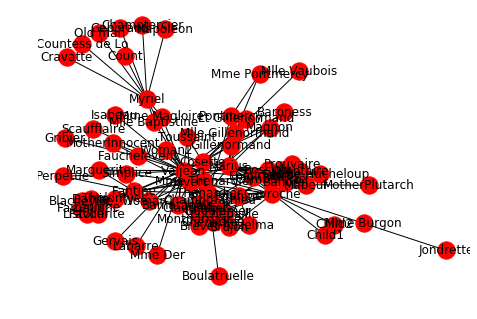

In [56]:
nx.draw(miserables, labels = names)

## To do

* Generate the Havel-Hakimi graph associated with the degree sequence of Les Miserables.

In [59]:
degrees = [kv[1] for kv in miserables.degree]
#degrees

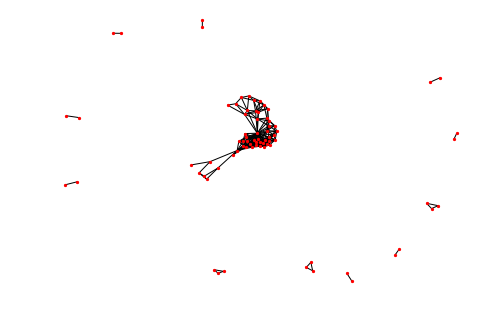

In [80]:
miserable_havel = nx.havel_hakimi_graph(degrees)
nx.draw(miserable_havel, node_size=5)

### * How many connected components are there in this graph?

In [81]:
n_co = nx.number_connected_components(miserable_havel)
print(n_co)

12


### * How many common edges are there with the original graph ?

In [37]:
n_common_edges = 0
miserable_edges = miserables.edges()

for edge in miserable_havel.edges():
    if edge in miserable_edges:
        n_common_edges+=1

n_common_edges

94

## Configuration model

The configuration model generates a random  instance of a **multi-graph** with some given  degree sequence. Any sequence of even sum is valid. Self-loops and multi-edges must be removed to get a simple graph.

In [82]:
config = nx.configuration_model([2,4])

Name: 
Type: MultiGraph
Number of nodes: 2
Number of edges: 3
Average degree:   3.0000


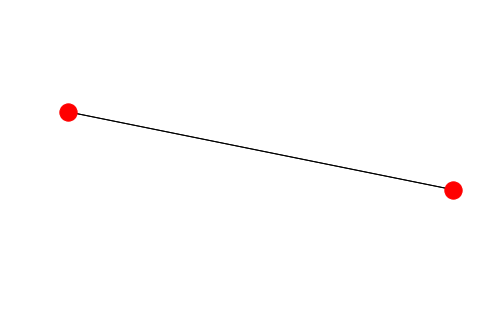

In [83]:
print(nx.info(config))
nx.draw(config)

In [84]:
graph = nx.Graph(config)
graph.remove_edges_from(config.selfloop_edges())

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000


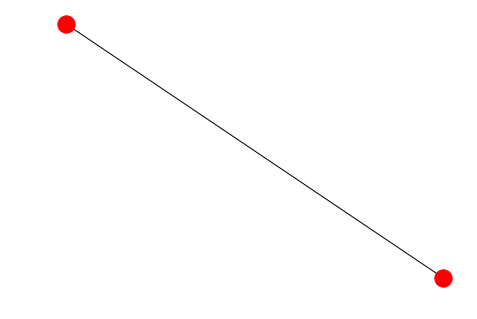

In [85]:
print(nx.info(graph))
nx.draw(graph)

## To do

* Test various degree sequences.

Name: 
Type: MultiGraph
Number of nodes: 5
Number of edges: 7
Average degree:   2.8000


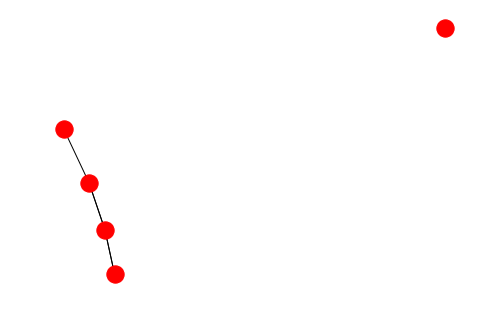

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 3
Average degree:   1.2000


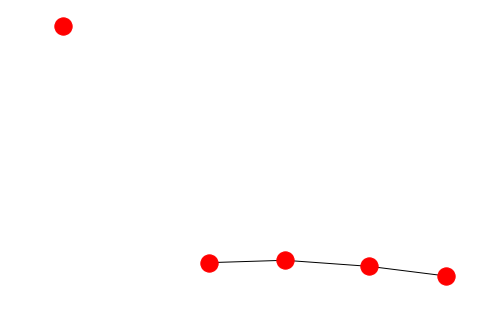

In [86]:
seq = np.random.choice([2,3,4,5], 5).tolist()
config = nx.configuration_model(seq)
print(nx.info(config))
nx.draw(config)
plt.show()
graph = nx.Graph(config)
graph.remove_edges_from(config.selfloop_edges())
print(nx.info(graph))
nx.draw(graph)
plt.show()

* Generate random configurations associated with the degree sequence of Les Miserables.
* What is the average number of common edges with the original graph?

In [87]:
def n_common_edges(graph_1, graph_2):
    n_common_edges = 0
    graph_1_edges =graph_1.edges()
    for edge in graph_2.edges():
        if edge in graph_1_edges:
            n_common_edges+=1
    return n_common_edges

def generate_config(original_graph, n, show=False):
    degrees = [kv[1] for kv in original_graph.degree]
    list_n_common_edge = []
    
    for i in range(n):
        config = nx.configuration_model(degrees)
        graph = nx.Graph(config)
        graph.remove_edges_from(config.selfloop_edges())
        if show:
            print(nx.info(graph))
            nx.draw(graph, node_size=5)
            plt.show()
        list_n_common_edge.append(n_common_edges(original_graph, graph))
    
    return np.mean(list_n_common_edge)

In [89]:
generate_config(miserables, 100, False)

55.21


* What is the average number of common edges between the original graph of Les Miserables and an Erdos-Renyi graph of the same size (77 nodes and 254 edges on average)?


In [90]:
n = 77
p = 0.08682

n_edge = []
for i in tqdm(range(10000)):
    erdos = nx.erdos_renyi_graph(n,p)
    n_edge.append(len(erdos.edges()))
    
print(np.mean(n_edge))

100%|██████████| 10000/10000 [00:08<00:00, 1240.00it/s]

254.042


In [91]:
n = 77
p = 0.08682

n_common_edge = []
for i in tqdm(range(10000)):
    erdos = nx.erdos_renyi_graph(n,p)
    n_common_edge.append(n_common_edges(miserables, erdos))
    
print(np.mean(n_common_edge))

100%|██████████| 10000/10000 [00:10<00:00, 962.81it/s]

22.0149


# * Interpret the results.